In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='charges', ylabel='Count'>

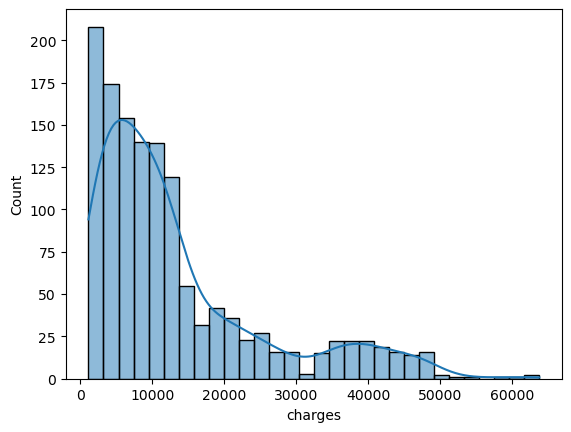

In [10]:
 sns.histplot(df['charges'],kde=True) 

In [11]:
from scipy.stats import boxcox
df['bmi_boxcox'],_ = boxcox(df['bmi']+1)

<Axes: xlabel='log_charges', ylabel='Count'>

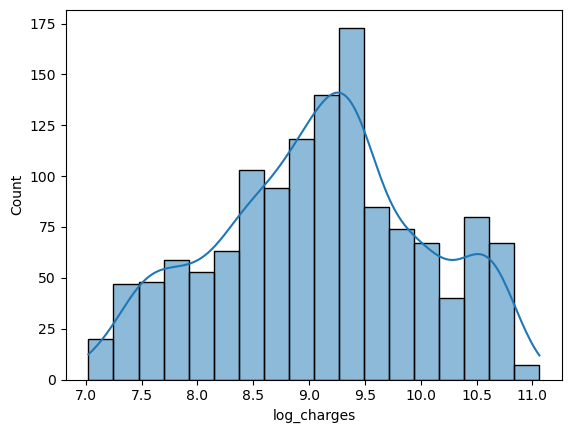

In [13]:
df['log_charges'] = np.log1p(df['charges'])
sns.histplot(df['log_charges'],kde=True)

## Feature Engineering:

In [14]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi_boxcox,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,7.763290,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,8.618976,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.511575,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,6.920914,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,7.912470,8.260455


In [15]:
# creating category as per bmi and age 
df['bmi_cat'] = pd.cut(df['bmi'],bins=[0,18.5,25,30,100],labels=['under','normal','over','obese'])
df['age_group'] = pd.cut(df['age'],bins=[17,30,45,60,100],labels=['young','adult','mature','senior'])
df['age_smoker'] =df['age']*(df['smoker']=='yes')

In [16]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi_boxcox,log_charges,bmi_cat,age_group,age_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,7.763290,9.734236,over,young,19
1,18,male,33.770,1,no,southeast,1725.55230,8.618976,7.453882,obese,young,0
2,28,male,33.000,3,no,southeast,4449.46200,8.511575,8.400763,obese,young,0
3,33,male,22.705,0,no,northwest,21984.47061,6.920914,9.998137,normal,adult,0
4,32,male,28.880,0,no,northwest,3866.85520,7.912470,8.260455,over,adult,0


<Axes: xlabel='bmi_cat', ylabel='charges'>

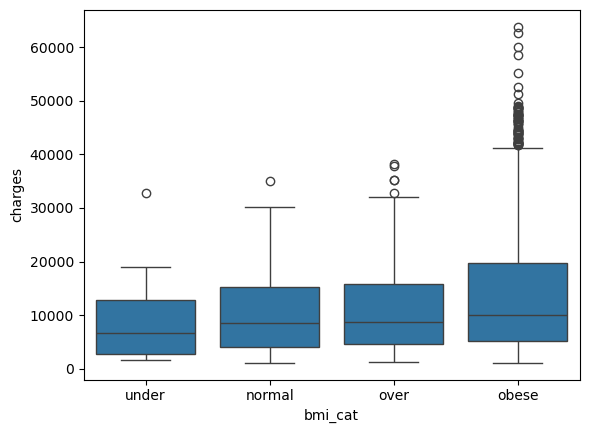

In [17]:
sns.boxplot(x='bmi_cat',y='charges',data=df)

## Check unique values of categorical fields:

In [18]:
for col in ['sex','smoker','region','bmi_cat','age_group']:
    print(col,df[col].value_counts())
    print()

sex sex
male      676
female    662
Name: count, dtype: int64

smoker smoker
no     1064
yes     274
Name: count, dtype: int64

region region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

bmi_cat bmi_cat
obese     705
over      386
normal    226
under      21
Name: count, dtype: int64

age_group age_group
young     444
mature    409
adult     394
senior     91
Name: count, dtype: int64

